<a href="https://colab.research.google.com/github/henry5250/SpotCheck/blob/main/scripts/2_exploratoryplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read in the zip files with the images.

In [ ]:
import zipfile
import os

zip_files = ['/content/Harmonia_axyridis.zip', '/content/Coccinella_novemnotata.zip']
extract_dir = '/content/extracted_images'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

print(f"All files extracted to {extract_dir}")

All files extracted to /content/extracted_images


Listing images from: /content/extracted_images/Harmonia_axyridis
Displaying: 0060.jpg


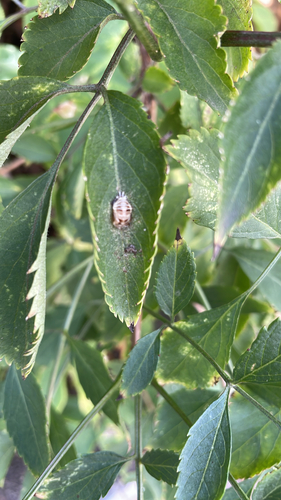

Displaying: 0066.jpg


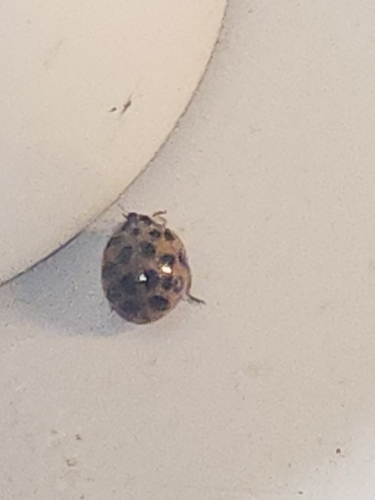

Displaying: 0095.jpg


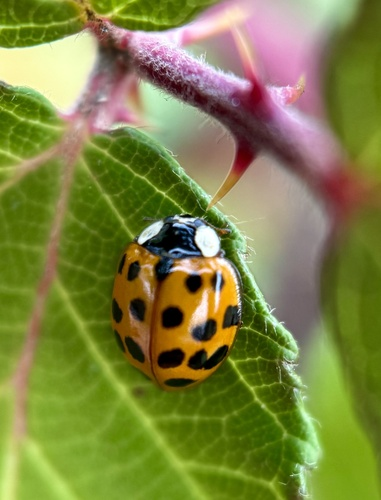

Displaying: 0086.jpg


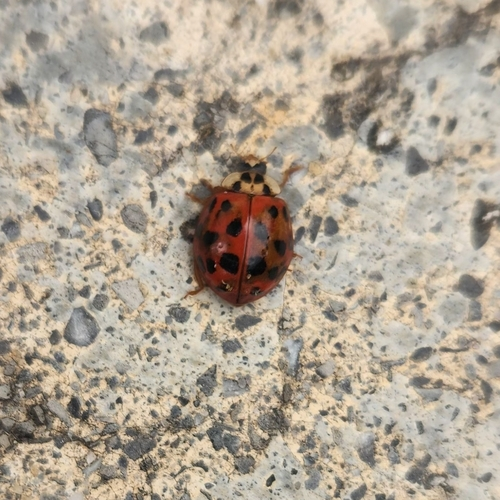

Displaying: 0058.jpg


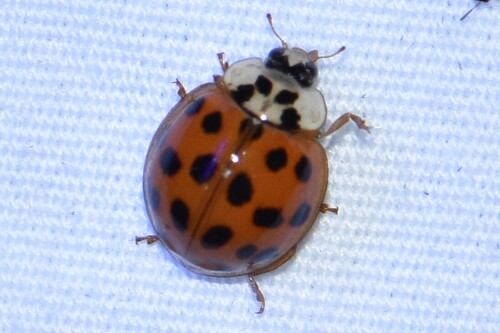

------------------------------
Listing images from: /content/extracted_images/Coccinella_novemnotata
Displaying: 0049.jpg


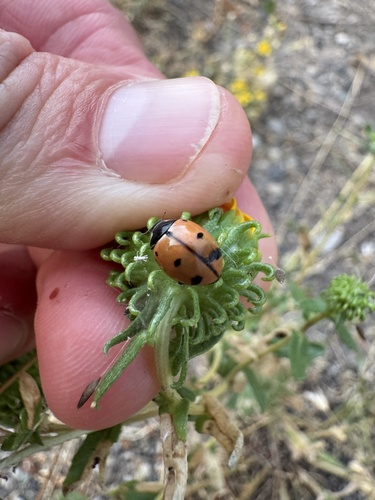

Displaying: 0082.jpg


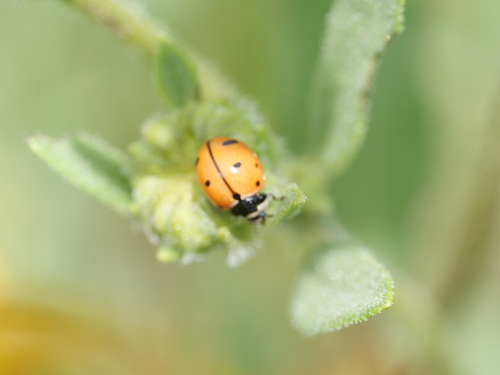

Displaying: 0070.jpg


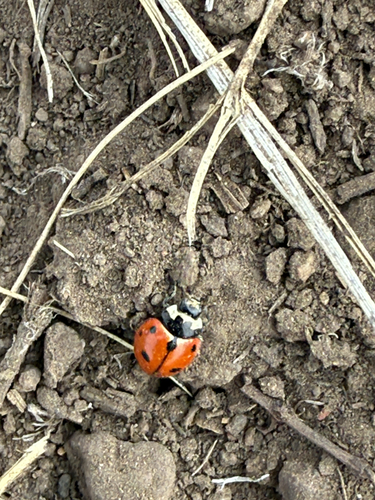

Displaying: 0076.jpg


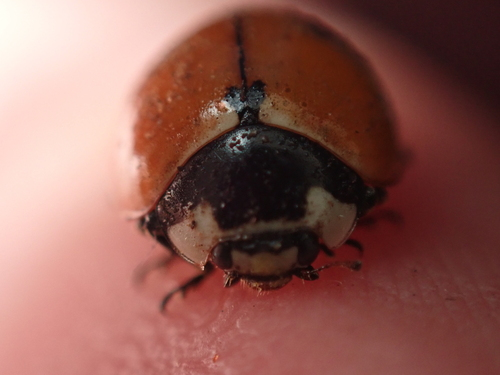

Displaying: 0089.jpg


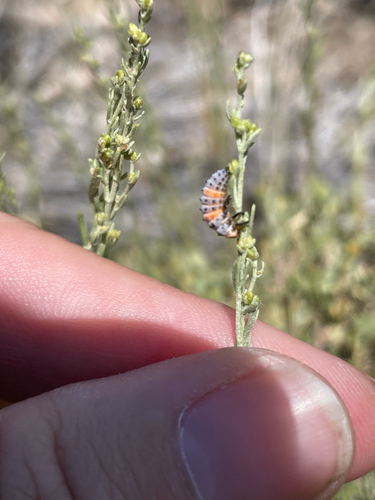

------------------------------


In [ ]:
import os
import random
from IPython.display import display, Image

extracted_dirs = [os.path.join(extract_dir, os.path.splitext(os.path.basename(zip_file))[0]) for zip_file in zip_files]

for directory in extracted_dirs:
    print(f"Listing images from: {directory}")
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print("No image files found.")
        continue

    # Display a few random images
    sample_images = random.sample(image_files, min(5, len(image_files))) # Display up to 5 images
    for image_name in sample_images:
        image_path = os.path.join(directory, image_name)
        print(f"Displaying: {image_name}")
        display(Image(filename=image_path))
    print("-" * 30)

# Preprocessing Steps:
- resize all the images in the files to 224x224 pixels
- normalize all the resized images by scaling the pixel values from [0,1]

# Resize all the images to 224x224 pixels

In [ ]:
%pip install Pillow

In [ ]:
from PIL import Image
import os

def resize_and_save_image(image_path, target_size):
    """
    Resizes an image and saves it, overwriting the original file.

    Args:
        image_path (str): The path to the image file.
        target_size (tuple): The target size as (width, height).
    """
    try:
        img = Image.open(image_path)
        img_resized = img.resize(target_size)
        img_resized.save(image_path)
        print(f"Resized and saved: {image_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")


In [ ]:
# 1. Define the target size for the images as a tuple (width, height).
target_size = (224, 224)

# 2. Iterate through the list of extracted directories
for directory in extracted_dirs:
    print(f"Processing images in: {directory}")
    # 3. For each directory, list all files within it.
    all_files = os.listdir(directory)

    # 4. Filter the list of files to include only image files
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No image files found in this directory.")
        continue

    # 5. For each identified image file, construct the full image path
    for image_name in image_files:
        image_path = os.path.join(directory, image_name)
        # 6. Call the resize_and_save_image function
        resize_and_save_image(image_path, target_size)

Processing images in: /content/extracted_images/Harmonia_axyridis


NameError: name 'resize_and_save_image' is not defined

In [ ]:
import os
from PIL import Image

# Select a few image files to verify resizing
# We can iterate through the processed directories and pick a few examples
verification_images = []
for directory in extracted_dirs:
    all_files = os.listdir(directory)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        # Select up to 3 random images from each directory for verification
        verification_images.extend([os.path.join(directory, img) for img in random.sample(image_files, min(3, len(image_files)))])

# Verify the dimensions of the selected images
print("\nVerifying dimensions of a few resized images:")
for image_path in verification_images:
    try:
        img = Image.open(image_path)
        print(f"Image: {os.path.basename(image_path)}, Dimensions: {img.size}")
        img.close() # Close the image file
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while verifying {image_path}: {e}")


Verifying dimensions of a few resized images:
Image: 0084.jpg, Dimensions: (375, 500)
Image: 0046.jpg, Dimensions: (375, 500)
Image: 0069.jpg, Dimensions: (375, 500)
Image: 0002.jpg, Dimensions: (500, 500)
Image: 0079.jpg, Dimensions: (375, 500)
Image: 0102.jpg, Dimensions: (375, 500)


# Normalize the images

In [ ]:
import numpy as np

def resize_normalize_and_save_image(image_path, target_size):
    """
    Resizes and normalizes an image, then saves it, overwriting the original file.

    Args:
        image_path (str): The path to the image file.
        target_size (tuple): The target size as (width, height).
    """
    try:
        img = Image.open(image_path)
        img_resized = img.resize(target_size)

        # Convert to NumPy array and normalize
        img_array = np.array(img_resized)
        img_normalized = img_array / 255.0

        # Convert back to PIL Image (handle different modes)
        if img_resized.mode == 'RGB':
            img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8), 'RGB')
        elif img_resized.mode == 'L': # Grayscale
             img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8), 'L')
        else:
             # Handle other modes if necessary, or convert to RGB/L
             img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8)) # Default mode

        img_processed.save(image_path)
        print(f"Resized, normalized, and saved: {image_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

In [ ]:
# 1. Iterate through the list of extracted directories
for directory in extracted_dirs:
    print(f"Processing images in: {directory}")
    # 2. For each directory, list all files within it.
    all_files = os.listdir(directory)

    # 3. Filter the list of files to include only image files
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No image files found in this directory.")
        continue

    # 4. For each identified image file, construct the full image path
    for image_name in image_files:
        image_path = os.path.join(directory, image_name)
        # 5. Call the resize_normalize_and_save_image function
        resize_normalize_and_save_image(image_path, target_size)

Processing images in: /content/extracted_images/Harmonia_axyridis
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0110.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0004.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0063.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0074.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0044.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0115.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0103.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0084.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0006.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0016.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0020.jpg

/tmp/ipython-input-510045688.py:21: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8), 'RGB')


Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0064.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0059.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0009.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0033.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0010.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0037.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0099.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0061.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0079.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0038.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0057.jpg
Resized, normalized, and saved: /content/extracted_images/Harmoni

In [ ]:
import numpy as np

# Select a few image files to verify resizing and normalization
# We can iterate through the processed directories and pick a few examples
verification_images = []
for directory in extracted_dirs:
    all_files = os.listdir(directory)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        # Select up to 3 random images from each directory for verification
        verification_images.extend([os.path.join(directory, img) for img in random.sample(image_files, min(3, len(image_files)))])

# Verify the dimensions and pixel value range of the selected images
print("\nVerifying dimensions and pixel values of a few processed images:")
for image_path in verification_images:
    try:
        img = Image.open(image_path)
        print(f"Image: {os.path.basename(image_path)}")

        # Check dimensions
        print(f"  Dimensions: {img.size}")
        if img.size != target_size:
            print(f"  Warning: Dimensions mismatch. Expected {target_size}, got {img.size}")

        # Convert to NumPy array and check pixel values
        img_array = np.array(img)
        min_pixel_value = np.min(img_array)
        max_pixel_value = np.max(img_array)

        print(f"  Min pixel value: {min_pixel_value}")
        print(f"  Max pixel value: {max_pixel_value}")

        # Check if values are in the expected range [0, 255] for uint8 after normalization
        # The normalization function converted to uint8 before saving, so we expect [0, 255]
        if min_pixel_value < 0 or max_pixel_value > 255:
             print(f"  Warning: Pixel values outside the expected range [0, 255].")


        img.close() # Close the image file
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while verifying {image_path}: {e}")


Verifying dimensions and pixel values of a few processed images:
Image: 0049.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 244
Image: 0100.jpg
  Dimensions: (224, 224)
  Min pixel value: 13
  Max pixel value: 255
Image: 0073.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0037.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0052.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 254
Image: 0071.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for plotting
image_data = {}
labels = []
for directory in extracted_dirs:
    class_name = os.path.basename(directory)
    image_data[class_name] = []
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for image_name in image_files:
        image_path = os.path.join(directory, image_name)
        try:
            img = Image.open(image_path)
            img_array = np.array(img)
            image_data[class_name].append(img_array)
            labels.append(class_name)
            img.close()
        except FileNotFoundError:
            print(f"Error: File not found at {image_path}")
        except Exception as e:
            print(f"An error occurred while processing {image_path}: {e}")

Generating Histograms of Pixel Intensity...


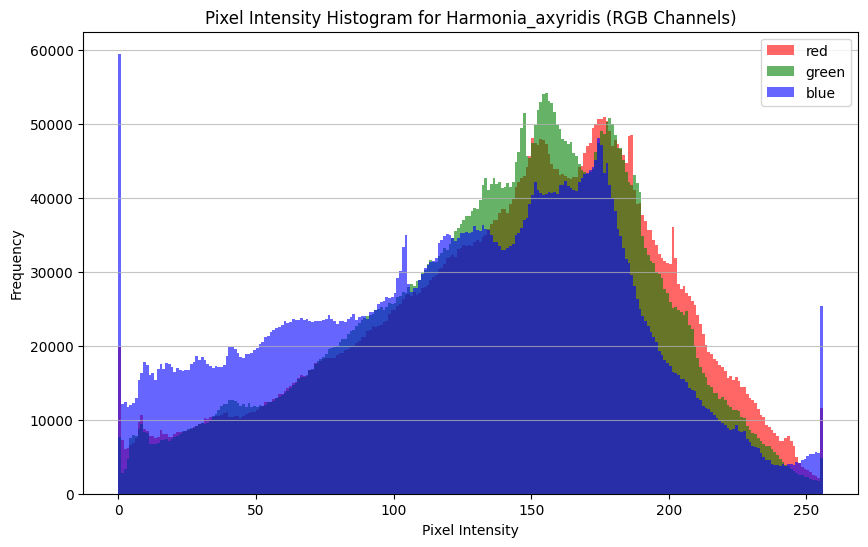

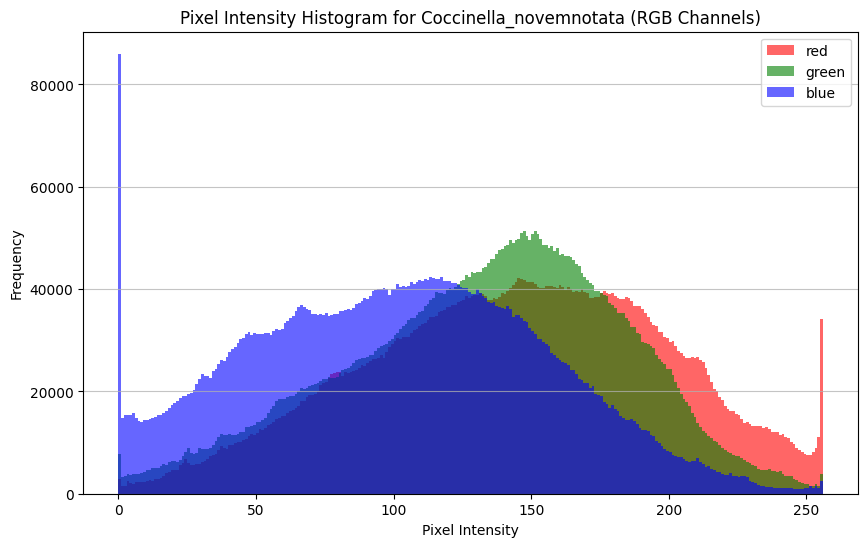

Histograms generated.


In [ ]:
# Create Histograms of Pixel Intensity

print("Generating Histograms of Pixel Intensity...")

for class_name, images_array in image_data.items():
    if not images_array:
        print(f"No image data for class: {class_name}")
        continue

    # Concatenate all images for this class to get overall distribution
    all_pixels = np.concatenate(images_array)

    plt.figure(figsize=(10, 6))

    if all_pixels.ndim == 3: # Color image (H, W, C)
        # Plot histograms for each channel
        colors = ('red', 'green', 'blue')
        for i, color in enumerate(colors):
            # Flatten the channel and plot histogram
            plt.hist(all_pixels[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.6, label=color)
        plt.title(f'Pixel Intensity Histogram for {class_name} (RGB Channels)')
        plt.legend()
    elif all_pixels.ndim == 2: # Grayscale image (H, W)
        # Plot histogram for grayscale
        plt.hist(all_pixels.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.8)
        plt.title(f'Pixel Intensity Histogram for {class_name} (Grayscale)')

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

print("Histograms generated.")